In [30]:
import numpy as np
import matplotlib.pyplot as plt 
import imageio
import cv2 

from object_track_class import Object_Tracker

In [31]:
################
# helper funcs #
################

##
# gif reader
# https://stackoverflow.com/questions/48163539/how-to-read-gif-from-url-using-opencv-python
##
def read_gif_data(filename):
    gif = imageio.mimread(filename)
    f,r,c,ch = np.array(gif).shape
    imgs = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in gif])
    return imgs/np.max(imgs)

##
# down sample
# https://stackoverflow.com/questions/34231244/downsampling-a-2d-numpy-array-in-python/34232507
##
def downsample(img_arr, factor):
    return img_arr[:, ::factor, ::factor]

#######

################
# read in data #
################
fname = "btyMo96pc.gif"

im_gif = downsample(read_gif_data(fname), 5)

num_frames, row, col = im_gif.shape

fnum = 3
im_gif_process = im_gif[fnum:fnum+2,:,:]


In [32]:
###################
# Object Tracking #
###################

Obj_Track = Object_Tracker()
Obj_Track.Track_Obj(im_gif_process)

seg_mask = Obj_Track.seg_mask
vx = Obj_Track.of_mapx
vy = Obj_Track.of_mapy


In [33]:
ds_mask = downsample(seg_mask.reshape(1, row, col), 2)[0,:,:]
ds_img = downsample(im_gif_process,2)
frame0 = ds_img[0,:,:]
frame1 = ds_img[1,:,:]

r, c = frame0.shape
vx = vx.reshape(r,c)
vx = vx
vy = vy.reshape(r,c)
vy = vy



0.0 0.0
0.0 0.0


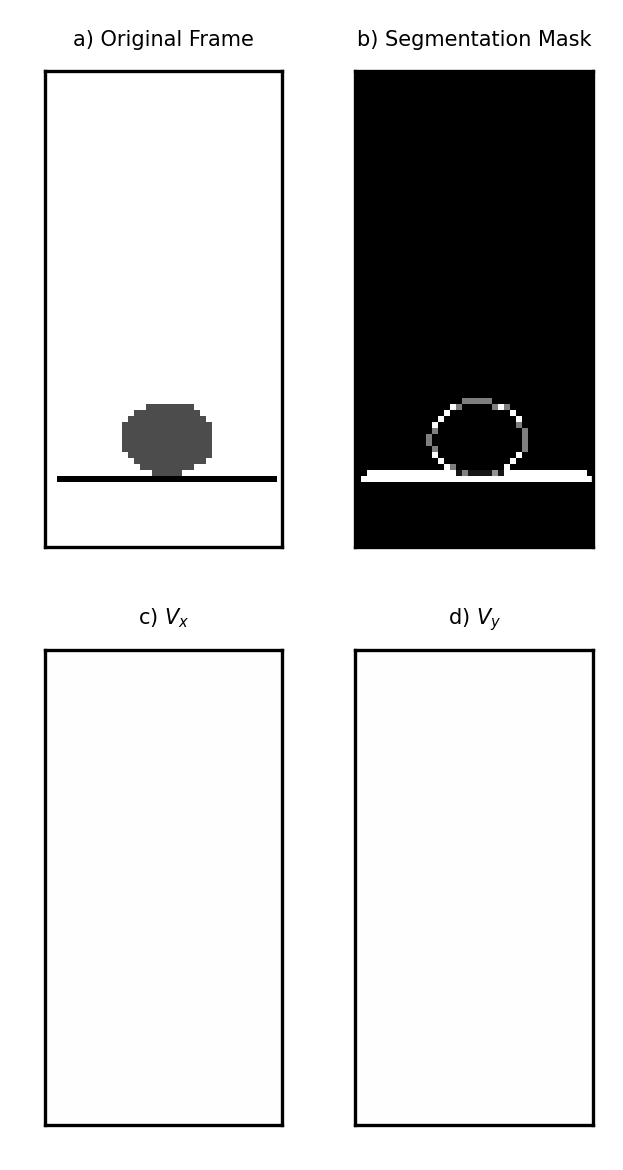

In [34]:
########
# plot #
########

print(np.min(vx), np.max(vx))
print(np.min(vy), np.max(vy))


f1, ax = plt.subplots(2,2)

a3 = ax[0,0].imshow(frame0, cmap="gray", vmin=0, vmax=1)
ax[0,0].set_title("a) Original Frame", fontsize=5)
a3.axes.get_xaxis().set_visible(False)
a3.axes.get_yaxis().set_visible(False)

a4 = ax[0,1].imshow(ds_mask, cmap="gray")
ax[0,1].set_title("b) Segmentation Mask", fontsize=5)
a4.axes.get_xaxis().set_visible(False)
a4.axes.get_yaxis().set_visible(False)

a1 = ax[1,0].imshow(vx, cmap="bwr", interpolation="nearest", vmin=-1, vmax=1)
ax[1,0].set_title("c) $V_{x}$", fontsize=5)
a1.axes.get_xaxis().set_visible(False)
a1.axes.get_yaxis().set_visible(False)

a2 = ax[1,1].imshow(vy, cmap="bwr", interpolation="nearest", vmin=-1, vmax=1)
ax[1,1].set_title("d) $V_{y}$", fontsize=5)
a2.axes.get_xaxis().set_visible(False)
a2.axes.get_yaxis().set_visible(False)

f1.set_dpi(300)
f1.tight_layout(rect=[0,0,0.6,1])

